In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [175]:
df = pd.read_csv(r"train.csv") #Loading the dataset

# **Exploratory Data Analysis**

In [176]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [178]:
df.shape

(891, 12)

In [179]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [180]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Cleaning and Processing the dataset**

In [181]:
# Dropping the PassengerID, Name and Ticket columns as they do not contribute to the model
df = df.drop("PassengerId", axis = 1)
df = df.drop("Name", axis = 1)
df = df.drop("Ticket", axis = 1)

In [182]:
# Obtaining all the columns that have object datatype
categorical_cols = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_cols.append(column)
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

SEX :  2
Sex
female    314
male      577
Name: count, dtype: int64


CABIN :  147
Cabin
D56            1
B78            1
B30            1
D10 D12        1
A5             1
              ..
C22 C26        3
D              3
G6             4
B96 B98        4
C23 C25 C27    4
Name: count, Length: 147, dtype: int64


EMBARKED :  3
Embarked
Q     77
C    168
S    644
Name: count, dtype: int64




In [183]:
df["Cabin"] = df["Cabin"].apply(lambda x: x[0] if type(x) == str else x) #Getting the Block in which the passenger stayed among the cabins

In [184]:
df.loc[:, categorical_cols]

,Sex,Cabin,Embarked
0,male,NaN,S
1,female,C,C
2,female,NaN,S
3,female,C,S
4,male,NaN,S
...,...,...,...
886,male,NaN,S
887,female,B,S
888,female,NaN,S
889,male,C,C


In [185]:
# One hot encoding the categorical columns
onehot = preprocessing.OneHotEncoder(drop = "if_binary").fit(df.loc[:, categorical_cols])
onehotdf = np.array(onehot.transform(df.loc[:, categorical_cols]).toarray())
encoded_df = pd.DataFrame(onehotdf, columns=onehot.get_feature_names_out(categorical_cols))
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

In [186]:
# Inserting the mean value of ages in the NaN values of Age
from sklearn.impute import SimpleImputer
imputer_numerical = SimpleImputer(strategy='mean')
df[['Age']] = imputer_numerical.fit_transform(df[['Age']])

In [187]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,3,22.000000,1,0,7.2500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,38.000000,1,0,71.2833,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.000000,0,0,7.9250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,1,35.000000,1,0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,3,35.000000,0,0,8.0500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0,3,29.699118,1,2,23.4500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [188]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

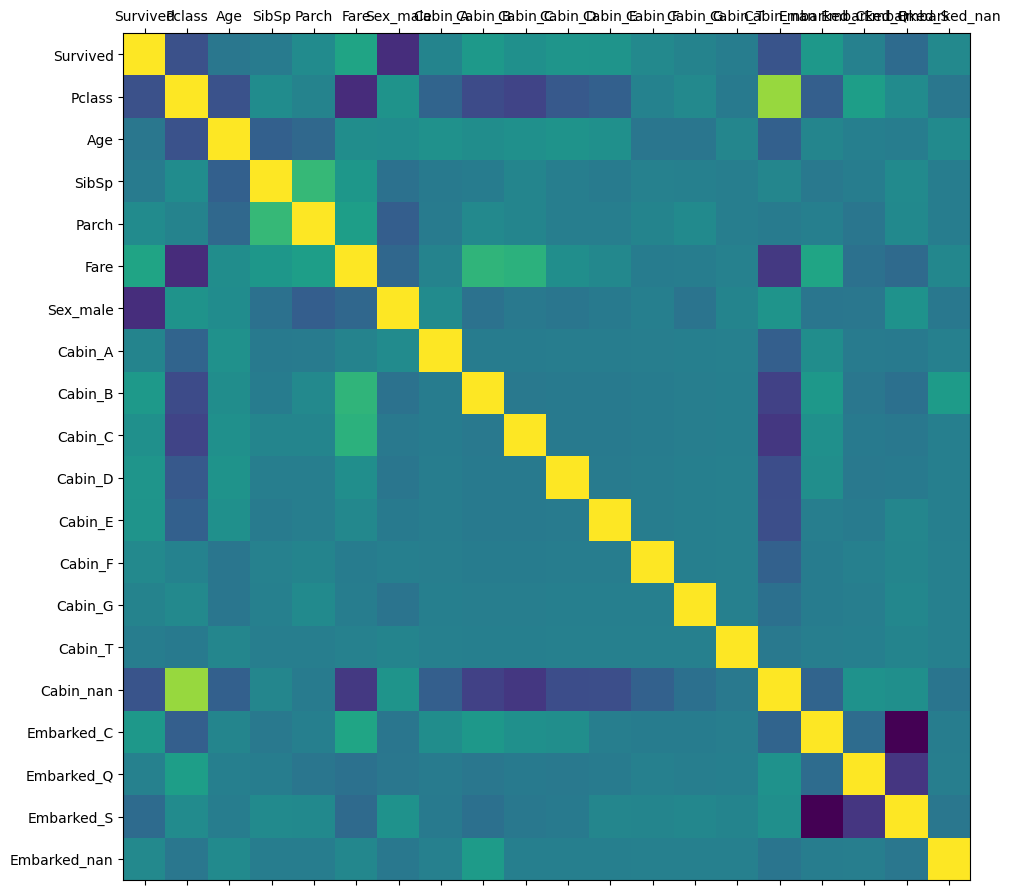

In [189]:
plot_corr(df)

Very little correlation between features can be observed.

In [190]:
# sns.pairplot(df,diag_kind='kde')

In [191]:
survived_samples = len(df[df['Survived'] == 1])
died_samples = len(df[df['Survived'] == 0])
print(f"Survived samples: {survived_samples/(survived_samples+died_samples) * 100}")
print(f"Died samples: {died_samples/(survived_samples+died_samples) * 100}")

Survived samples: 38.38383838383838
Died samples: 61.61616161616161


# **Training the model**

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X = df.drop("Survived", axis = 1)
Y = df["Survived"]

In [194]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [195]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
114,3,17.000000,0,0,14.4583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
874,2,28.000000,1,0,24.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
76,3,29.699118,0,0,7.8958,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
876,3,20.000000,0,0,9.8458,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
674,2,29.699118,0,0,0.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [196]:
y_train.head()

,Survived
114,0
874,1
76,0
876,0
674,0


In [197]:
print("Original Survived Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Survived'] == 1]), ((len(df.loc[df['Survived'] == 1])/len(df.index)) * 100)))
print("Original Died Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Survived'] == 0]), ((len(df.loc[df['Survived'] == 0])/len(df.index)) * 100)))
print("")
print("Training Survived Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Died Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Survived Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Died Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Survived Values    : 342 (38.38%)
Original Died Values   : 549 (61.62%)

Training Survived Values    : 227 (36.44%)
Training Died Values   : 396 (63.56%)

Test Survived Values        : 115 (42.91%)
Test Died Values       : 153 (57.09%)



1. Logistic Regression

In [198]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [199]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7723880597014925


The model has 77.2 % accuracy.

In [200]:
f1_score_model = metrics.f1_score(y_test, y_predict)
print(f1_score_model)

0.726457399103139


<Axes: >

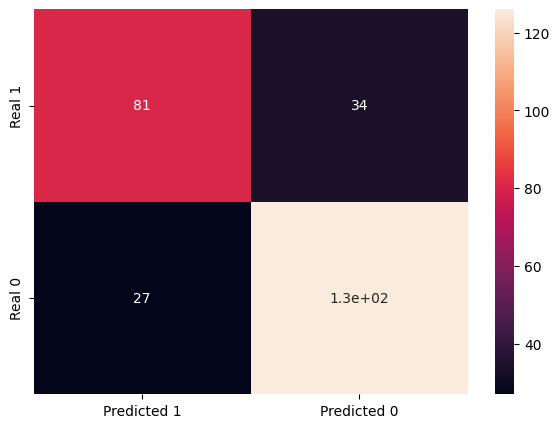

In [201]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Real 1","Real 0"]],
                  columns = [i for i in ["Predicted 1","Predicted 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

2. Random Forest

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {"n_estimators":[100, 150, 200], "max_depth": [2, 3, 4, 5, 6, 7]}
clf = GridSearchCV(rf, parameters)
clf.fit(x_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [100, 150, 200]})

In [203]:
print("Best score obtained :", clf.best_score_)
print("Best set of parameters obtained :",clf.best_params_)

Best score obtained : 0.8443354838709677
Best set of parameters obtained : {'max_depth': 6, 'n_estimators': 200}


In [204]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.sort_values("mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.436635,0.228805,0.017415,0.001190,7,200,"{'max_depth': 7, 'n_estimators': 200}",0.800,0.848,0.864,0.862903,0.846774,0.844335,0.023309,1
14,0.545178,0.179227,0.025357,0.004763,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.800,0.848,0.864,0.862903,0.846774,0.844335,0.023309,1
15,0.333714,0.256782,0.032139,0.037721,7,100,"{'max_depth': 7, 'n_estimators': 100}",0.784,0.856,0.856,0.870968,0.846774,0.842748,0.030381,3
13,0.243252,0.010772,0.014436,0.001519,6,150,"{'max_depth': 6, 'n_estimators': 150}",0.784,0.856,0.864,0.854839,0.854839,0.842735,0.029567,4
9,0.158599,0.003339,0.012956,0.003873,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.792,0.864,0.864,0.846774,0.846774,0.842710,0.026499,5
12,0.171302,0.016294,0.010647,0.001233,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.792,0.848,0.856,0.854839,0.846774,0.839523,0.024037,6
11,0.429444,0.209545,0.018529,0.000898,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.792,0.864,0.848,0.846774,0.846774,0.839510,0.024636,7
16,0.247101,0.012805,0.014731,0.001191,7,150,"{'max_depth': 7, 'n_estimators': 150}",0.768,0.840,0.864,0.870968,0.846774,0.837948,0.036726,8
10,0.236726,0.008226,0.014111,0.000567,5,150,"{'max_depth': 5, 'n_estimators': 150}",0.776,0.864,0.872,0.838710,0.838710,0.837884,0.033696,9
8,0.314608,0.002518,0.018207,0.001875,4,200,"{'max_depth': 4, 'n_estimators': 200}",0.800,0.872,0.856,0.814516,0.846774,0.837858,0.026655,10


We can see that for estimators with n_estimators as 200 and max depth as 6 have their performance only slightly better than estimators with n_estimators as 150 and max_depth as 6.

3. ADA Boost

In [205]:
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier()
parameters = {"n_estimators":[50, 100, 200], "learning_rate": np.logspace(-1, 1, 5)}
clf = GridSearchCV(ADA, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ]),
                         'n_estimators': [50, 100, 200]})

In [206]:
print("Best score obtained :", clf.best_score_)
print("Best set of parameters obtained :",clf.best_params_)

Best score obtained : 0.8154451612903225
Best set of parameters obtained : {'learning_rate': np.float64(1.0), 'n_estimators': 200}


4. Linear Discriminant Analysis

In [207]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
pipe = Pipeline([('lda', LinearDiscriminantAnalysis()), ("Logistic Regression", LogisticRegression())])
parameters = {"lda__n_components":[1, 2, 3, 4]}
clf = GridSearchCV(pipe, parameters)
clf.fit(x_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('lda', LinearDiscriminantAnalysis()),
                                       ('Logistic Regression',
                                        LogisticRegression())]),
             param_grid={'lda__n_components': [1, 2, 3, 4]})

In [208]:
print("Best score obtained :", clf.best_score_)
print("Best set of parameters obtained :",clf.best_params_)

Best score obtained : 0.8138193548387097
Best set of parameters obtained : {'lda__n_components': 1}


In [209]:
pipe2 = Pipeline([('lda', LinearDiscriminantAnalysis()), ("rf", RandomForestClassifier())])
parameters = {"lda__n_components":[1, 2, 3, 4], "rf__n_estimators":[100, 150, 200], "rf__max_depth": [2, 3, 4, 5, 6, 7]}
clf = GridSearchCV(pipe2, parameters)
clf.fit(x_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('lda', LinearDiscriminantAnalysis()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'lda__n_components': [1, 2, 3, 4],
                         'rf__max_depth': [2, 3, 4, 5, 6, 7],
                         'rf__n_estimators': [100, 150, 200]})

In [210]:
print("Best score obtained :", clf.best_score_)
print("Best set of parameters obtained :",clf.best_params_)

Best score obtained : 0.8186193548387097
Best set of parameters obtained : {'lda__n_components': 1, 'rf__max_depth': 2, 'rf__n_estimators': 100}


In [211]:
pipe3 = Pipeline([('lda', LinearDiscriminantAnalysis()), ("adb", AdaBoostClassifier())])
parameters = {"lda__n_components":[1, 2, 3, 4], "adb__n_estimators":[50, 100, 200], "adb__learning_rate": np.logspace(-1, 1, 5)}
clf = GridSearchCV(pipe3, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('lda', LinearDiscriminantAnalysis()),
                                       ('adb', AdaBoostClassifier())]),
             param_grid={'adb__learning_rate': array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ]),
                         'adb__n_estimators': [50, 100, 200],
                         'lda__n_components': [1, 2, 3, 4]})

In [212]:
print("Best score obtained :", clf.best_score_)
print("Best set of parameters obtained :",clf.best_params_)

Best score obtained : 0.8250322580645161
Best set of parameters obtained : {'adb__learning_rate': np.float64(3.1622776601683795), 'adb__n_estimators': 50, 'lda__n_components': 1}


The best model of the them can be seen as the Random Forest model with 150 estimators and max depth as 6

In [247]:
model = RandomForestClassifier(n_estimators=150, max_depth=6)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7798507462686567

# **Prediction of the model on the given test data**

In [248]:
X_predict = pd.read_csv(r"test.csv")

In [250]:
X_predict.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [251]:
X_predict.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [252]:
imputer_numerical = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')

X_predict[['Cabin']] = imputer_categorical.fit_transform(X_predict[['Cabin']])
X_predict[['Age']] = imputer_numerical.fit_transform(X_predict[['Age']])
X_predict[['Fare']] = imputer_numerical.fit_transform(X_predict[['Fare']])


In [253]:
X_predict["Cabin"] = X_predict["Cabin"].apply(lambda x: x[0] if type(x) == str else x)

In [254]:
onehotdf = np.array(onehot.transform(X_predict.loc[:, categorical_cols]).toarray())
encoded_df = pd.DataFrame(onehotdf, columns=onehot.get_feature_names_out(categorical_cols))
X_predict = pd.concat([X_predict.drop(columns=categorical_cols), encoded_df], axis=1)

In [255]:
X_predict = X_predict.drop("PassengerId", axis = 1)
X_predict = X_predict.drop("Name", axis = 1)
X_predict = X_predict.drop("Ticket", axis = 1)

In [256]:
X_predict

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,3,34.50000,0,0,7.8292,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,47.00000,1,0,7.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,62.00000,0,0,9.6875,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,27.00000,0,0,8.6625,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,22.00000,1,1,12.2875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
414,1,39.00000,0,0,108.9000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
415,3,38.50000,0,0,7.2500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
416,3,30.27259,0,0,8.0500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [257]:
model_prediction = model.predict(X_predict)

In [258]:
model_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [259]:
pd.DataFrame(model_prediction, ).to_csv('model_predictions.csv', index=False)